In [1]:
"""install the packages to run this code"""
#%pip install matplotlib tifffile scipy tqdm pybaselines

'install the packages to run this code'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
#import cv2
#from PIL import Image
#from pybaselines.whittaker import asls
from scipy import interpolate
from scipy.ndimage import gaussian_filter
from scipy.signal import cheby1, filtfilt, find_peaks, peak_widths
from tqdm import tqdm

In [3]:
video = "//files.ubc.ca/team/BNRC/NINC/Raymond Lab/Kaiiiii/cortical data/Pilot/2023_11_01/405700_f3_stage2_pilot_day3_violet.tif"

In [4]:
def load_frames(video):
    """
    Loads in tif stacks as a 3d array. Make sure the dtype is 12.
    :param video: path to the file, including file name.tif

    :return: 3d array of 128x128 x timeseries
    """

    print("video loading please wait...")
    frames = tifffile.imread(video)
    print("dimensions are", frames.shape, "as a", frames.dtype)
    return frames

In [5]:
frames = load_frames(video);

video loading please wait...
dimensions are (18133, 128, 128) as a uint16


In [6]:
def plot_frame(frames:np.ndarray, frame_number, cmap = 'jet'):
    """
    plots a frame of interest, to check if the video was loaded in properly
    :param frames: 3d array loaded in with tifffile
    :param frame_number: frame of interest to plot
    :param cmap: colormap used, set to jet as default
    """

    image = frames[frame_number, :, :]
    fig, ax = plt.subplots()
    im = ax.imshow(image, cmap=cmap)
    plt.colorbar(im)
    ax.grid(True)
    ax.axis('on')
    print("frame number", frame_number, "plotted")
    plt.show()


frame number 5000 plotted


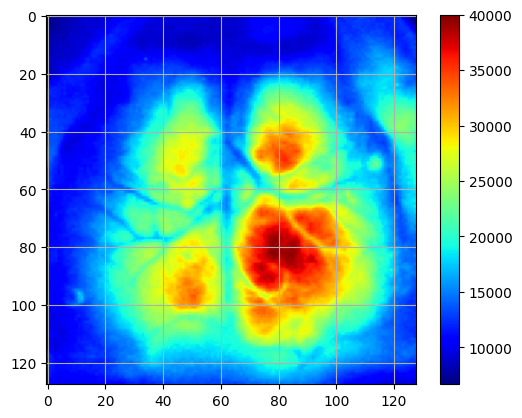

In [7]:
plot_frame(frames, 5000)

In [123]:
def temporal_mean(frames):
    """
    calculate and plot the signal over time
    
    :param frames: 3d array loaded in with tifffile
    :return: 1d array where each frame intensity is averaged
    """
    mean_timecourse = frames.mean(axis=(1,2))

    min_value = np.min(mean_timecourse)     # Find the minimum value in the signal array
    dark_frame_threshold = min_value + 0.2 * min_value     # Calculate the threshold as the minimum value plus 10%

    #plotting
    print("default 20% threshold is", dark_frame_threshold, "Determine if adjustments need to be made")
    plt.plot(mean_timecourse)
    plt.title("mean timecourse")
    plt.xlabel("frame number (30 fps)")
    plt.ylabel("intensity value (A.U)")
    
    plt.show()
    return mean_timecourse

default 20% threshold is 6329.5828125 Determine if adjustments need to be made


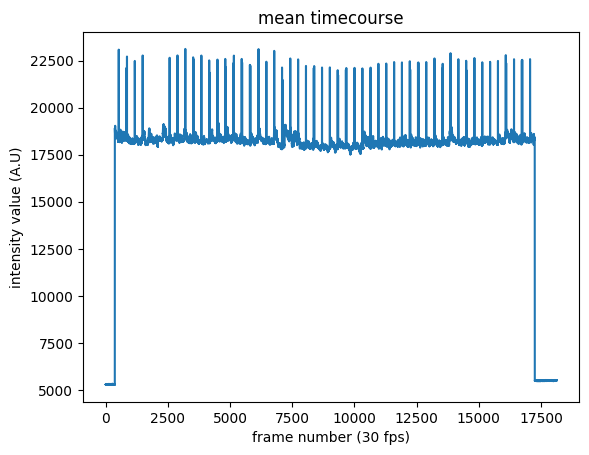

In [124]:
mean_timecourse = temporal_mean(frames);

In [108]:
def remove_dark_frames(frames, signal, threshold = 0.2):
    """
    calculate where the dark frames are at the start and end of the trial

    :param frames: 3d array loaded in with tifffile
    :param signal: 1d array mean_time course array
    :param threshold: a percent above the minimum value, default set to 20%

    return: 
    """
    min_value = np.min(signal)     # Find the minimum value in the signal array
    dark_frame_threshold = min_value + threshold * min_value     # Calculate the threshold as the minimum value plus 10%
    
    brain_indices = np.where(signal > dark_frame_threshold)[0]
    start_index = brain_indices[0]+1
    end_index = brain_indices[-1]
    
    frames = frames[start_index:end_index, :, :]
    signal = signal[start_index:end_index]

    #plotting
    print("threshold determined to be:", dark_frame_threshold)
    plt.plot(signal)
    plt.title("mean timecourse with dark frames removed")
    plt.xlabel("frame number (30 fps)")
    plt.ylabel("intensity value (A.U)")
    
    return signal

threshold determined to be: 5802.117578125


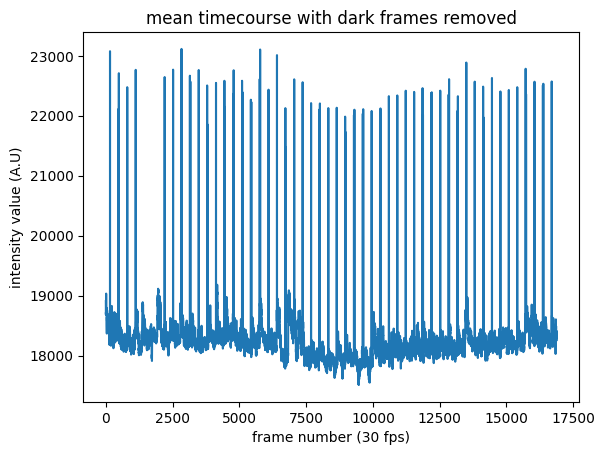

In [109]:
df_removed = remove_dark_frames(frames, mean_timecourse, 0.1)

In [ ]:
def extract_artifacts():

In [ ]:
def interpolte():

In [ ]:
def remove_dark_frames(mean_timecourse,
                      threshold):
    """
    Calculate the start and end points of video based on the mean values + threshold

    :param signal: 1d array with the mean value for each frame
    :param threshold: The threshold for the mean value that is used to calculate the
                        start and end points by ensuring that the mean value is at
                        least +10% of the minimum mean value

    :return: start index, end index, array of signal with endpoints removed
    """
    cut_off = mean_timecourse.min()*(1+threshold) #determines where the cut-off is based on a percent above the min value
    start_side = mean_timecourse > cut_off #start dark frames, 
    end_side = mean_timecourse[::-1] > cut_off
    
    start_index = np.argmax(left_side) + 2
    end_index = (len(signal) - np.argmax(right_side)) - 2
    
    thresholded_signal = mean_timecourse[start_index:end_index + 1]
    plt.plot(thresholded_signal)
    plt.show()

    return thresholded_signal


In [72]:
threshold = 0.4


In [77]:
cut_off = mean_timecourse.min()*(1+threshold)


TypeError: 'numpy.ndarray' object is not callable